In [1]:
# Firstly, we need to prepare the parameter file(s). The full list of parameters of the JJ model and 
# their default or recommended values are given in the special manual in jjmodel/docs/mydoc, 
# where jjmodel is the directory where the code has been installed. 
# When the parameter file(s) is/are prepared, we can start using the jjmodel. In the beginning, we import   
# some functions and classes from the package modules. 

# One of the important lines below is "from jjmodel.input_ import p, a, inp":
# - p (namedtuple) contains all the parameters specified in the parameter file(s);
# - a (namedtuple) is a collection of useful arrays and indices, it's good to have them at hand;
# - inp (dict) contains some of the model input functions (generated with parameters in p).

# The input_.py prints all parameters and their total number. Note that in the general case this number  
# of parameters is not equal to the number of physical parameters of this realization of the JJ model:
# some of them are technical and some others may be not important for some of the model predictions.
# So, the final number of parameters depends on the user's goals and need to be checked in each case.
# Chosen parameter values are automatically checked for consistency with each other (and common sense). 
# Then, a list of reminders, warnings, and errors is printed, pay attention to these.

# In this tutorial, p.run_mode==0, this means that only the Solar neighborhood will be modeled. 

import numpy as np 
from jjmodel.tools import Timer
from jjmodel.constants import tp
from jjmodel.iof import tab_reader
from jjmodel.input_ import p, a, inp
from jjmodel.funcs import IMF, SFR
from jjmodel.mwdisk import disk_builder
from jjmodel.populations import stellar_assemblies_r
from jjmodel.analysis import GetPopulations
from jjmodel.plotting import Plotting, PlotBlocks



Parameter file(s) : ok.
Number of parameters =  66 , among them technical =  7

 p(run_mode=0, out_dir='tutorial1', out_mode=1, nprocess=4, Rsun=8.2, zsun=20, zmax=2000, dz=2, sigmad=29.3, sigmat=4.9, sigmag1=2.0, sigmag2=11.0, sigmadh=51.9, sigmash=0.47, td1=0, td2=7.8, dzeta=0.8, eta=5.6, pkey=1, tt1=0.1, tt2=4, gamma=2, beta=3.5, imfkey=0, a0=1.31, a1=1.5, a2=2.88, a3=2.28, m0=0.49, m1=1.43, m2=6.0, dFeHdt=0, n_FeHdt=1, fehkey=0, FeHd0=-0.7, FeHdp=0.29, rd=0.34, q=-0.72, FeHt0=-0.94, FeHtp=0.04, rt=0.77, t0=0.97, FeHsh=-1.5, dFeHsh=0.4, n_FeHsh=5, alpha=0.375, sige=26.0, sigt=45, sigdh=140, sigsh=100, sigmap=array([3.5, 1.3]), tpk=array([10. , 12.5]), dtp=array([0.7 , 0.25]), sigp=array([26.3, 12.6]))

Parameters checked: 0 Reminders, 0 Warnings, 0 Errors.

Configuration finished:  0h 0m 0.1s


In [2]:
# Then, the disk model can be constructed straight away by simply calling the disk_builder() function:

if __name__ == '__main__':
    disk_builder(p,a,inp,status_progress=True)


Results of this run will be saved to already existing folder output/Rsun8.2_tutorial1

Output directory tree created.

---Local run---

  Process for R = 8.2 kpc: start       
    Process for R = 8.2 kpc: fimax optimized
      Process for R = 8.2 kpc: PE solved   
        Process 8.2   : exit, time: 0h 0m 0.62s


Input data saved.

Output data saved.

---Local run ended sucessfully---



In [3]:
# This function iteratively solved the Poisson-Boltzmann eq. and calculated a self-consistent 
# potential-density pair at p.Rsun. 

# All functions and classes of the jjmodel package have docstrings, such that users can get the information 
# about their parameters and usage (unless they are designed for the inner usage only). 
# To read the comments to the disk_builder function, simply do:

help(disk_builder)

# Remember that the same docstrings can be found in a more readable format in the documentation at 
# https://jjmodel.readthedocs.io/en/latest/index.html


Help on function disk_builder in module jjmodel.mwdisk:

disk_builder(p, a, inp, **kwargs)
    Constructs the disk (vertical structure at some Galactocentric distance). 
    Can work in two modes (depending on the parameter ``p.run_mode``):
        
        1. models the Solar neighbourhood only;
        2. starts with the Solar neighbourhood and then extends the local JJ model to other radii. 
        
    Input data (e.g. SFR and AMR) and results (e.g. potential, densities, scale heights, AVR) 
    are saved as txt files to the output directory ``a.dir``. 
    Accepts optional parameters of :func:`jjmodel.mwdisk.rbin_builder`. 
    
    :param p: Set of model parameters from the parameter file. 
    :type p: namedtuple
    :param a: Collection of the fixed model parameters, useful quantities, and arrays.
    :type a: namedtuple
    :param inp: Collection of the input functions including SFR, AVR, AMR, and IMF.
    :type inp: dict     
    :param status_progress: Optional. If True, th

In [4]:
# The input/output model data are sorted into the different folders of the output directory tree.  
# We can see the paths to these folders by printing the dict a.T. 

# 'main' is a path to the main output folder (all paths here are relative to the location of this script).
# Main folder contains the following subfolders: 'age', 'dens', 'fi', 'inp', 'kin', 'hess', 'maps', 'met',
# 'pop', and 'stat'. Each folder, except for 'stat', has two subfolders: 'plt' and 'tab' - for plots 
# and tables, respectively. In 'stat', there are log files with the details about iterations, this can be
# really useful if something goes wrong. Also, the code saves parameter file(s) there, such that later 
# we can easily find the parameter values used for this run. Note that this parameter file(s) can be shorter
# than those you fill for the run - the code removes parameters that are needed to build the global  
# model of the disk (see next tutorials) but are unnecessary for the Solar neighborhood. 

a.T


{'main': 'output/Rsun8.2_tutorial1',
 'dens': 'output/Rsun8.2_tutorial1/dens',
 'denstab': 'output/Rsun8.2_tutorial1/dens/tab',
 'densplt': 'output/Rsun8.2_tutorial1/dens/plt',
 'maps': 'output/Rsun8.2_tutorial1/maps',
 'mapstab': 'output/Rsun8.2_tutorial1/maps/tab',
 'mapsplt': 'output/Rsun8.2_tutorial1/maps/plt',
 'hess': 'output/Rsun8.2_tutorial1/hess',
 'hesstab': 'output/Rsun8.2_tutorial1/hess/tab',
 'hessplt': 'output/Rsun8.2_tutorial1/hess/plt',
 'fi': 'output/Rsun8.2_tutorial1/fi',
 'fitab': 'output/Rsun8.2_tutorial1/fi/tab',
 'fiplt': 'output/Rsun8.2_tutorial1/fi/plt',
 'age': 'output/Rsun8.2_tutorial1/age',
 'agetab': 'output/Rsun8.2_tutorial1/age/tab',
 'ageplt': 'output/Rsun8.2_tutorial1/age/plt',
 'inp': 'output/Rsun8.2_tutorial1/inp',
 'inptab': 'output/Rsun8.2_tutorial1/inp/tab',
 'inpplt': 'output/Rsun8.2_tutorial1/inp/plt',
 'height': 'output/Rsun8.2_tutorial1/height',
 'heighttab': 'output/Rsun8.2_tutorial1/height/tab',
 'heightplt': 'output/Rsun8.2_tutorial1/height/p

In [5]:
# To work with the observable stellar populations, we need to synthesize them using a stellar library. 
# We convert the model mono-age subpopulations into so-called stellar assemblies (SA) - populations 
# of the same stellar mass, age, and metallicity. 

# At this stage, we need to specify the IMF function. 
# /Technical note. IMF cannot be defined earlier, e.g. in input_.py file, because the function 
# for SA calculation, stellar_assemblies_r(), uses multiprocessing, and thus, cannot accept as in input 
# function imported from another module./

# By default, we use the 4-slope broken power-law IMF. It is also possible to use IMF of some other shape 
# (set 'imfkey' to 1 in parameter file; do 'help(imf)' to see some built-in IMF options or define your function). 

M_low, M_up = 0.08, 100      # Msun, lower and upper IMF mass limits
imf = IMF(M_low,M_up)        # Here we create class instance
mass, Nmdm = imf.BPL_4slopes(p.a0,p.a1,p.a2,p.a3,p.m0,p.m1,p.m2)   # and define the IMF 

# Then we call the function stellar_assemblies_r() for the Solar radius p.Rsun. 
# It produces three tables of SA: for the thin and thick disk and halo. 
# You can also have a look at its parameters by typing 'help(stellar_assemblies_r)'. 

timer = Timer()
t_start = timer.start()

# SA are synthesized using multiprocessing, so stellar_assemblies_r() must be wrapped like this:
if __name__ == '__main__':     
    stellar_assemblies_r(p.Rsun,p,a,inp['AMRd0'],inp['AMRt'],inp['SFRd0'],inp['SFRt0'],
                         p.sigmash,imf.number_stars,'Padova',3)
    
print('\n',timer.stop(t_start))

# There can be a warning saying that some of the modeled metallicities are outside of the isochrones'
# metallicity range. This is just something to keep in mind: the lower limit of metallicity 
# is -2.2 for Padova and -4.0 for MIST. So probably Padova is not very good for modeling 
# very metal-poor populations, but I don't know how significant systematic errors can be in this case. 

# Next step is to select several subsamples from the generated tables which can be done 
# with GetPopulations() class. There are several pre-defined populations, such as A- and F-type stars,
# Red Clump (RC), G- and K- dwarfs. 

mw_comp = ['d','t','sh']
kwgs = {'save':True}

timer = Timer()
t_start = timer.start()


pop = GetPopulations('Padova',p.Rsun,p,a)

print('\n','{:<11}'.format('R [kpc]'),'{:<11}'.format('RC stars'),'{:<11}'.format('A stars'),
      '{:<11}'.format('F stars'),'{:<11}'.format('G dwarfs'),'{:<11}'.format('K dwarfs'))
print('{:<1}'.format(''),'{:<11}'.format(p.Rsun),'{:<1}'.format(''),end='')

for k in range(len(mw_comp)):
    pop.rc_simple(mw_comp[k],**kwgs)        # There are two versions of RC selection. 
    pop.rc_clean(mw_comp[k],**kwgs)         # rc_clean() performs better cleaning of the RC sample 
    pop.a_stars(mw_comp[k],**kwgs)          # from other giants
    pop.f_stars(mw_comp[k],**kwgs)          
    pop.g_dwarfs(mw_comp[k],**kwgs)
    pop.k_dwarfs(mw_comp[k],**kwgs)
    
print('{:<11}'.format('x'),'{:<11}'.format('x'),'{:<11}'.format('x'),
      '{:<11}'.format('x'),'{:<11}'.format('x'))
                             
print('\n',timer.stop(t_start))



Stellar population synthesis for R = 8.2 kpc:
Warning. Some of modeled metallicities (halo) are outside of Padova metallicity range [-2.2,0.5], 
i.e., the adopted best isochrones may be not representative.
	thin disk	thick disk	halo

 0h 0m 12.75s

 R [kpc]     RC stars    A stars     F stars     G dwarfs    K dwarfs   
  8.2          x           x           x           x           x          

 0h 0m 4.12s


(<Figure size 720x504 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc18006a400>)

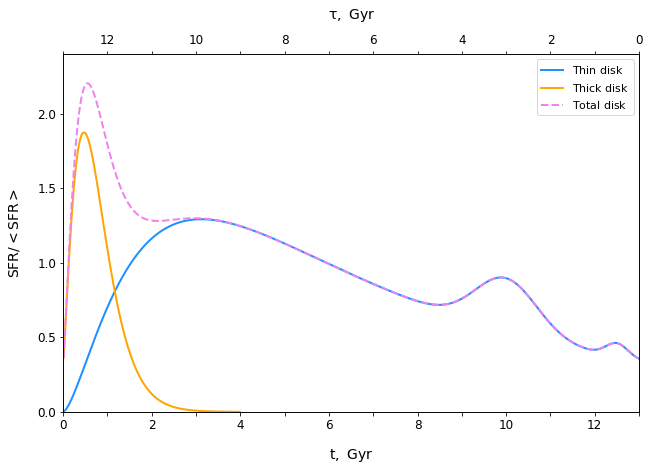

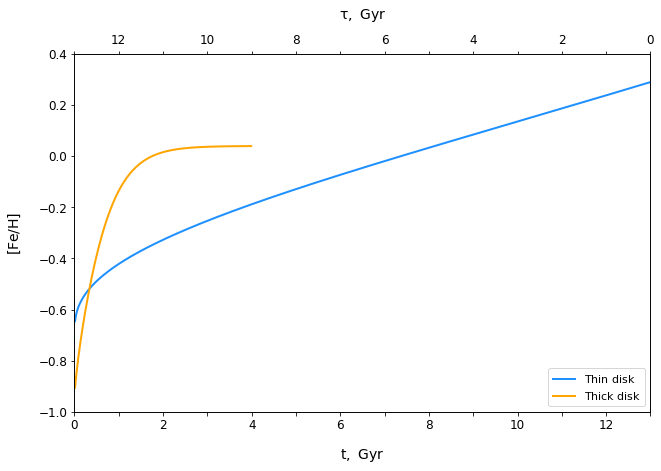

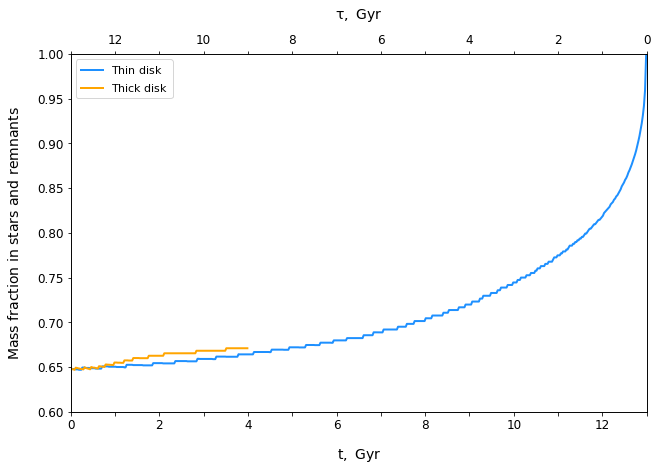

In [6]:
# The rest of this tutorial is about plotting the model input and output. 

# Let's use plotting tools of the jjmodel package. Of course, this is not absolutely necessary,
# but the in-built functions allow to have a quick look at the modeled quantities, so there is no need    
# to load (and quite often calculate) everything manually.
# Before we proceed, it is useful to remind and introduce some notations:

# MW stellar components                           Stellar populations
# 'd'   = thin disk                               'a'            = A stars 
# 't'   = thick disk                              'f'            = F stars
# 'sh'  = stellar halo                            'rc' or 'rc+'  = RC stars
# 'dt'  = thin + thick disk                       'gdw'          = G dwarfs
# 'tot' = thin + thick disk + stellar halo        'kdw'          = K dwarfs

# We use class Plotting():


P = Plotting(p,a,inp)   # Initialized with model parameters and basic arrays

# --------------------------------------------------------------------------------------------------
# Input functions
# --------------------------------------------------------------------------------------------------

P.nsfr_rsun_plt('dt')       # The normalized SFR of the total (thin+thick) disk. Use parameters 'd' or 't'.
                            # to plot thin or thick disk only. Add 'save=True' if you want the figure to be saved.
                            # As usually, see help(P.nsfr_rsun_plt) for more information or check 
                            # documentation at readthedocs - https://jjmodel.readthedocs.io/en/latest/funcs.html. 

# AMR and mass loss functions:        
P.amr_rsun_plt('dt')
P.g_rsun_plt('dt')

# Note, that some input and output quantities, such as mass loss function g 
# or vertical force Kz (see the next block below), are not given via analytic form,
# but are instead calculated on the grid, and therefore, look step-like.
# If needed, you can smooth them. 


(<Figure size 648x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc17ffcdaf0>)

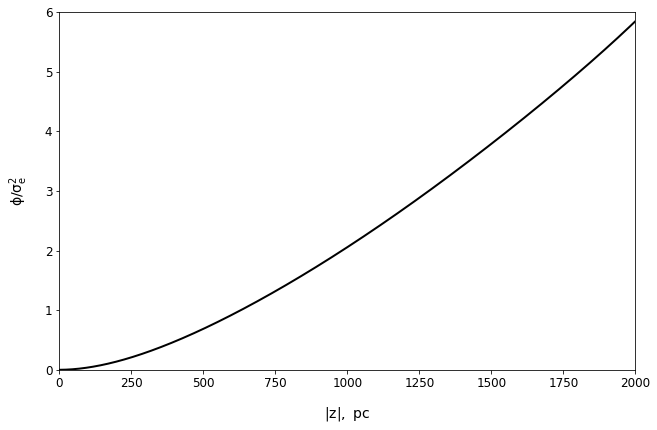

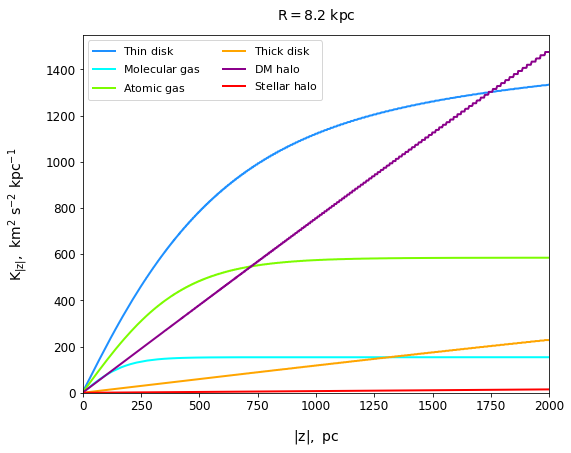

In [7]:
# --------------------------------------------------------------------------------------------------
# Potential and vertical force
# --------------------------------------------------------------------------------------------------

# Potential is normalized at the constant (SIGMA_E = 25 km/s)^2, see script constants.py in the jjmodel code.
P.fi_rsun_plt()

P.kz_plt(p.Rsun)


(<Figure size 648x504 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc17fd4dd90>)

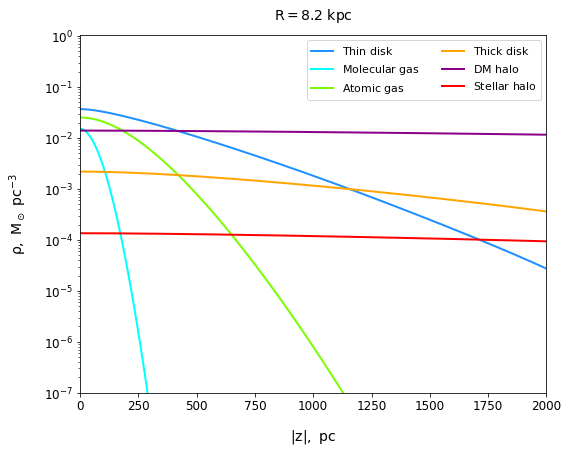

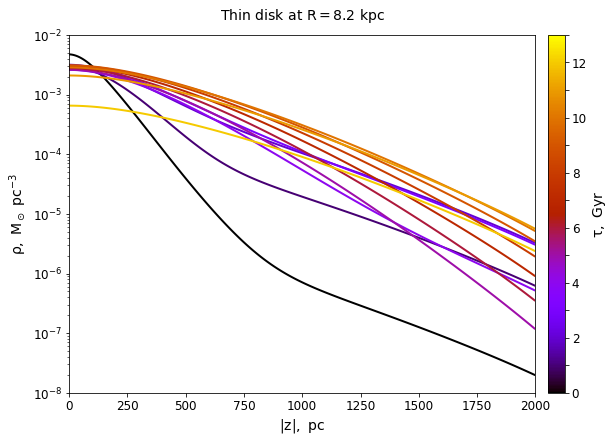

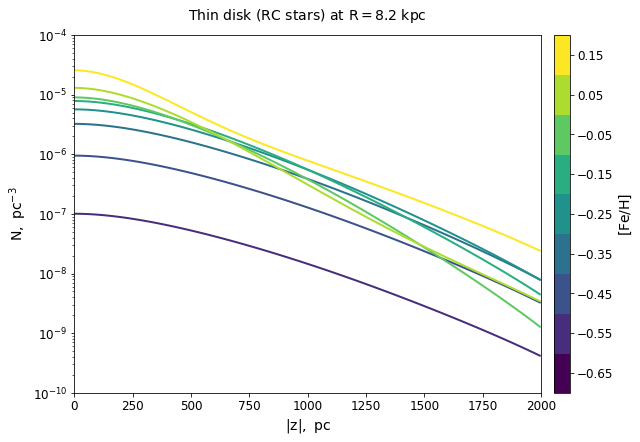

In [8]:
# --------------------------------------------------------------------------------------------------
# Density profiles
# --------------------------------------------------------------------------------------------------

# Overall vertical density profiles for all model components: 
P.rhoz_plt(p.Rsun)

# Density laws for the mono-age populations (age bins) 
# Use e.g. 'mode_pop='gdw'' if you want to select only G dwarfs, 
# 'number=True' together with 'mode_pop' keyword allows plotting stellar number density instead of matter density. 
# Note, that it's possible to plot densities not only for individual ages (i.e., for age bins with width 
# of the JJ-model time-resolution tr=25 Myr), but also for the custom age intervals (add 'between=True'). 

ages = np.arange(0,tp+1,1)   # Gyr
P.rhoz_monoage_plt('d',p.Rsun,ages,between=True)   # local thin-disk vertical density profiles 
                                                   # for age intervals given by 'ages' 

# Similar plot, but for metallicity bins and number density of RC stars.
# 'cbar_bins=True' produces the binned color bar instead of continuous one.
# You can also customize colormap by giving parameter 'cbar'. 
mets = np.arange(-0.7,0.3,0.1)     # dex
P.rhoz_monomet_plt('d',p.Rsun,mets,cbar_bins=True,cbar='viridis',mode_pop='rc',number=True)


(<Figure size 720x504 with 3 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc17fe66c40>)

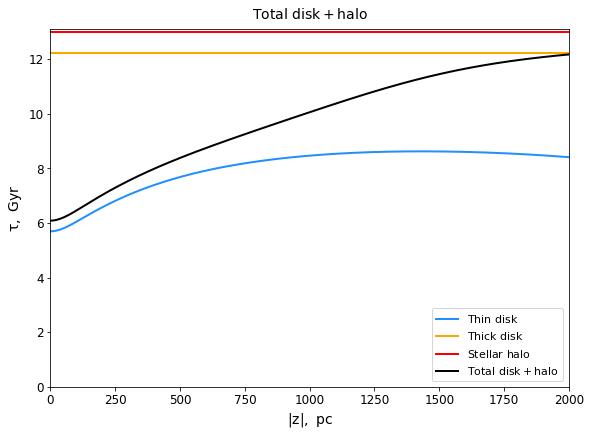

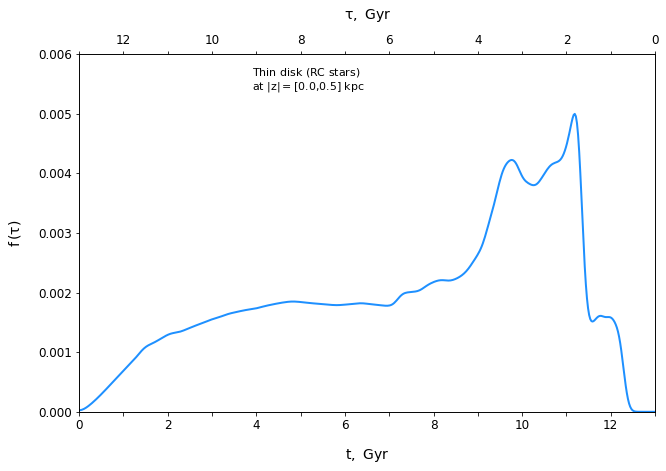

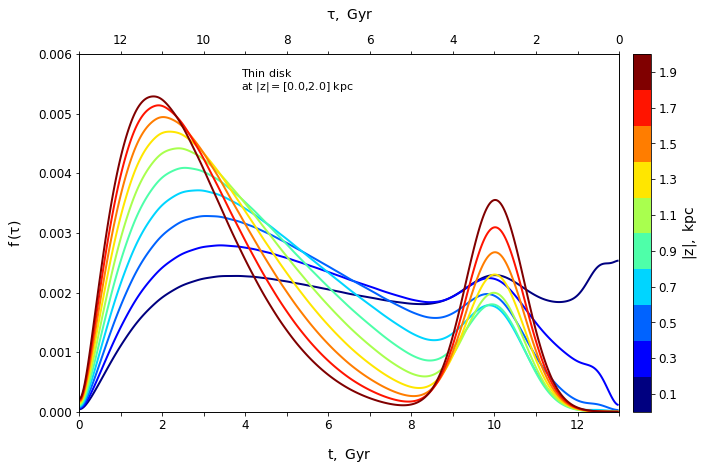

In [9]:
# --------------------------------------------------------------------------------------------------
# Ages
# --------------------------------------------------------------------------------------------------

# Vertical profile of the mean age (use 'number=True' with 'mode_pop' to plot age weighted with 
# stellar number density instead of mass density):
P.agez_rsun_plt('tot')

# Age distributions 
# Add 'cumulative=True' to plot cumulative age distributions. 
# Parameter 'sigma_gauss' (in Gyr) adds Gaussian smoothing. 
z_range = [0,500]  # pc
P.agehist_rsun_plt('d',z_range,mode_pop='rc',number=True,sigma_gauss=0.1)

# To see how age distributions change with height, give z-bins instead of a range of z:
z_slices = np.arange(0,p.zmax+200,200)  # pc
P.agehist_rsun_plt('d',z_slices,sigma_gauss=0.1,cbar_bins=True)


(<Figure size 720x504 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc17fad5f40>)

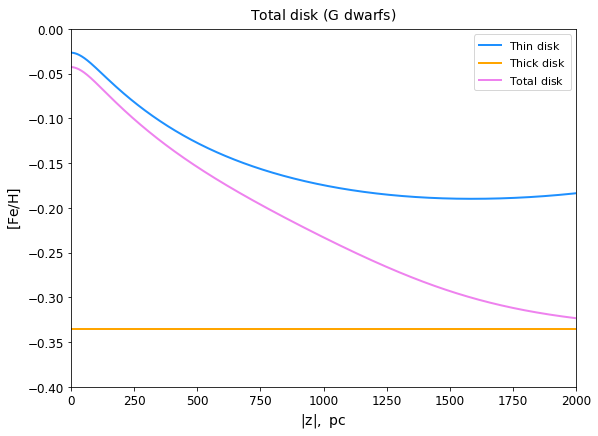

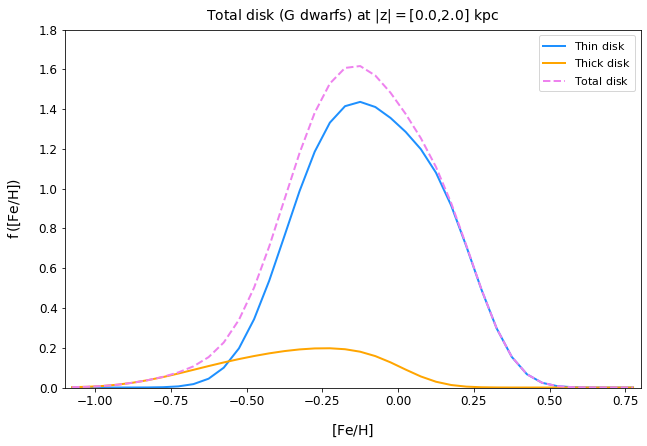

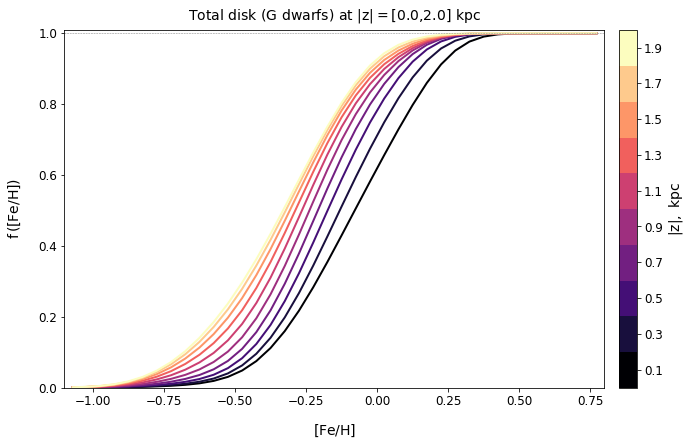

In [10]:
# --------------------------------------------------------------------------------------------------
# Metallicities
# --------------------------------------------------------------------------------------------------

# Vertical profile of the mean metallicity for G dwarfs:   
P.metz_rsun_plt('dt',mode_pop='gdw',number=True)

# Metallicity distribution for G dwarfs:
z_range = [0,p.zmax]  # pc
P.methist_rsun_plt('dt',z_range,mode_pop='gdw',number=True,sigma_gauss=0.1)

# Same, but in the different z-slices and cumulative:
z_slices = np.arange(0,p.zmax+200,200)  # pc
P.methist_rsun_plt('dt',z_slices,mode_pop='gdw',number=True,sigma_gauss=0.1,
                   cumulative=True,cbar_bins=True,cbar='magma')


(<Figure size 720x504 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc17fdd4280>)

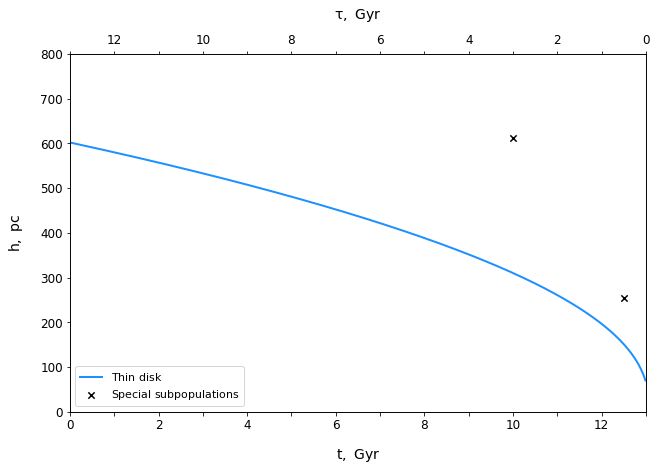

In [11]:
# --------------------------------------------------------------------------------------------------
# Scale heights
# --------------------------------------------------------------------------------------------------

# Scale heights of the thin-disk mono-age subpopulations. 
# When special populations are introduced (p.pkey=1), they have scale heights that differ 
# from the corresponding values of the thin-disk populations of the same age (shown with crosses):

P.h_rsun_plt()


(<Figure size 648x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc17fca7d00>)

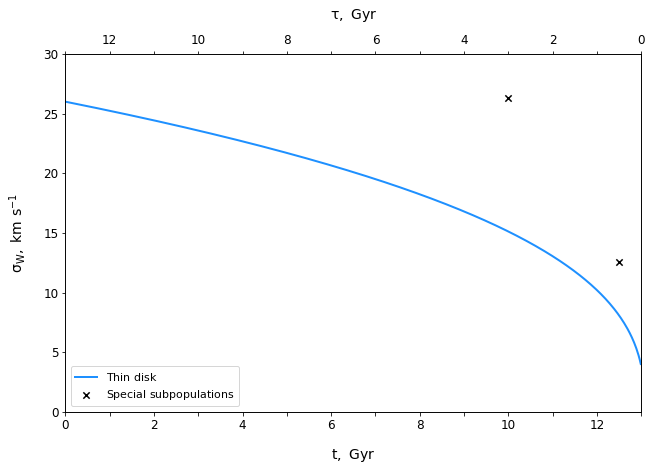

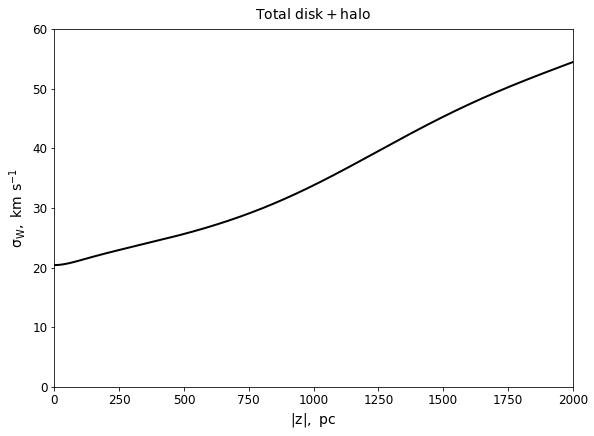

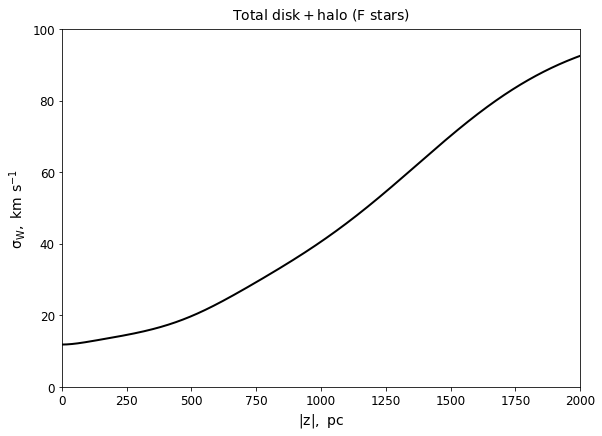

In [12]:
# --------------------------------------------------------------------------------------------------
# Kinematics part1
# --------------------------------------------------------------------------------------------------

# AVR (if there are special populations, they will be again shown with crosses):
P.avr_rsun_plt()

# Vertical profile of the mean W-velocity dispersion (use mode_pop and number=True for populations):
P.sigwz_rsun_plt('tot')

# Vertical profile of the mean W-velocity dispersion (use mode_pop and number=True for populations):
P.sigwz_rsun_plt('tot',mode_pop='f',number=True)


(<Figure size 648x504 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc17f923160>)

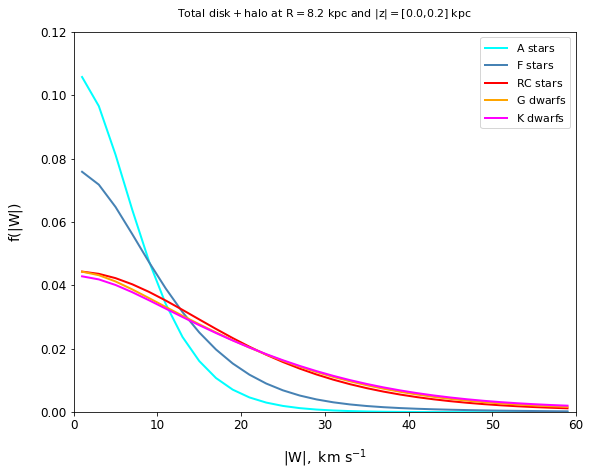

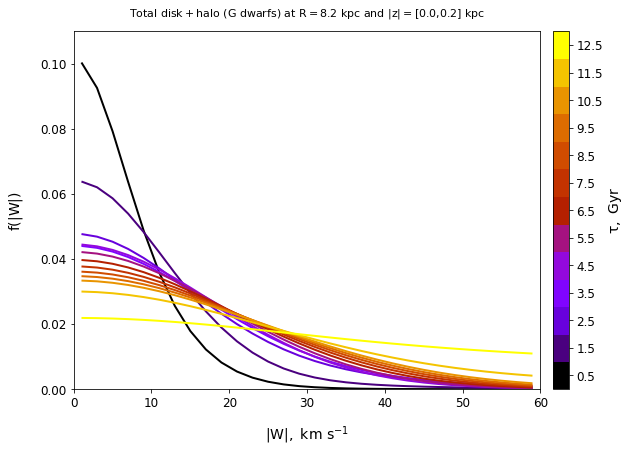

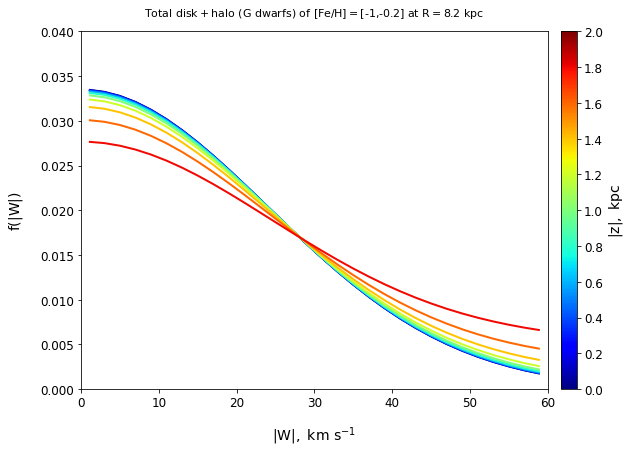

In [13]:
# --------------------------------------------------------------------------------------------------
# Kinematics part2
# --------------------------------------------------------------------------------------------------

# We can plot W-distributions for many different cases using fw_hist_plt(). 
# Let's define a range of z and plot f(|W|) for all our stellar populations:
z_range = [0,200] # pc
pop_list = ['a','f','rc','gdw','kdw']

P.fw_hist_plt('tot',p.Rsun,z_range,mode_pop=pop_list,number=True)

# f(|W|) for age bins can be plotted if keyword ages is used:
age_bins = np.arange(0,tp+1,1)
P.fw_hist_plt('tot',p.Rsun,z_range,ages=age_bins,mode_pop='gdw',number=True,cbar_bins=True)

# Also, metallicity interval can be chosen (metallicity bins with z_range),
# and f(|W|) in the different z-bins can be calculated: 
met_range = [-1,-0.2]  # Gyr
z_slices = np.arange(0,p.zmax+200,200)  # pc
P.fw_hist_plt('tot',p.Rsun,z_slices,mode_pop='gdw',number=True,mets=met_range)


(<Figure size 720x576 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc17fc95040>)

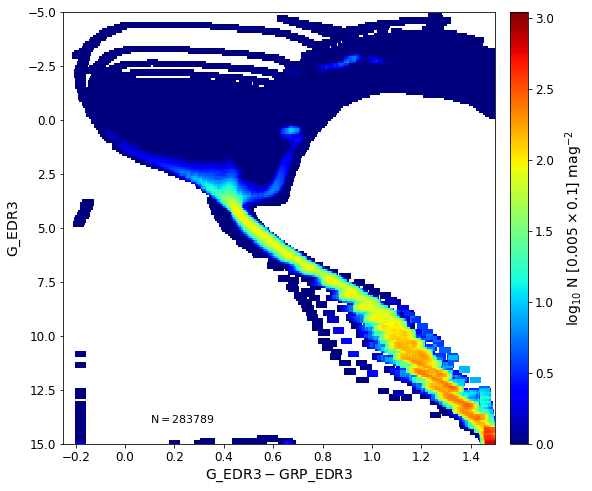

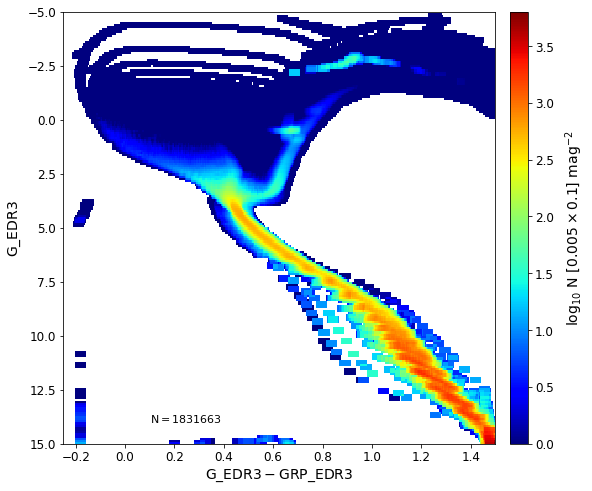

In [14]:
# --------------------------------------------------------------------------------------------------
# Hess diagrams
# --------------------------------------------------------------------------------------------------

# Hess diagram for all stars (no WDs in the stellar library) in the local sphere:
# We can also model a spherical shell by setting the inner radius in r_minmax. 
# Additionally, z-cut can be applied to this volume (keyword zlim).
radius = 100  # pc
P.hess_simple_plt('tot','local_sphere',['G_EDR3','G_EDR3','GRP_EDR3'],
                  [[-0.25,1.5],[-5,15]],[0.005,0.1],smooth=[0.05,0.3],r_minmax=[0,radius])

# Local cylinder 
height = 1000  # pc
P.hess_simple_plt('tot','local_cylinder',['G_EDR3','G_EDR3','GRP_EDR3'],
                  [[-0.25,1.5],[-5,15]],[0.005,0.1],smooth=[0.05,0.3],r_minmax=[0,radius],zlim=[0,height])


In [15]:
# There is also a possibility to plot many figures automatically (including those shown above)
# This can be done with PlotBlocks class, do help(PlotBlocks) to see all its methods.
# Figures are saved to 'plt' subfolders of the main folder in a.T directory tree. 
# Just dig into the output folder and examine the results.

z_slices = np.arange(0,p.zmax+200,200)    # pc
age_bins = np.arange(0,tp+0.25,0.25)      # Gyr
met_bins = np.arange(-0.8,0.55,0.05)      # dex
sigma_age = 0.1                           # Gyr
sigma_met = 0.1                           # dex
radius = 100                              # pc

PB = PlotBlocks(p,a,inp)

# The most general method is called basic_output:
PB.basic_output(z_slices,age_bins,met_bins,sigma_age,sigma_met,radius)



Plotting block of figures for the JJ model... 
Input                     :  	ok 
Potential                 :  	ok 
Scale heights             :  	ok 
Densities                 :  	ok 
Ages                      :  	ok 
Metallicities             :  	ok 
Kinematics                :  	ok 
Populations               :  	ok

PlotBlocks.basic_output:  0h 1m 0.98s
